# Microsoft's New Film Studio - Recommendations
<br>
<br>
<div>
<img src="clapper_board.jpeg" width="500"/>
</div>

#### Authors:
Henry Shin, Mackoy Staloch, Juana Tavera

## Overview

## Business Problem
The business problem at hand is that Microsoft is looking at a potential market entry into the movie making industry. They tasked the team with exploring what types of films are currently doing the best at the box office. Once these genres were identified, the team used their knowledge of the industry and insights found in their dataset to further provide recommendations for Microsoft’s market entry plan. 

## Data Understanding

In [1]:
#importing the necessary packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns

The datasets that we decided on using are:
- tn.movie_budgets.csv - The Numbers
- bom.movie_gross.csv - Box Office Mojo
- movie_profession.csv - IMDb csv we created previously

In [2]:
#bringing in the necessary files
the_numbers = pd.read_csv('data/tn.movie_budgets.csv', parse_dates=['release_date'])
movie_profession = pd.read_csv('data/movie_profession.csv', index_col=0)
mojo = pd.read_csv('data/bom.movie_gross.csv')

## Cleaning the Data

#### Box Office Mojo - cleaning, missing values, and more

In [3]:
the_numbers.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,2009-12-18,Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,2019-06-07,Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,2015-05-01,Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [4]:
the_numbers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 5782 non-null   int64         
 1   release_date       5782 non-null   datetime64[ns]
 2   movie              5782 non-null   object        
 3   production_budget  5782 non-null   object        
 4   domestic_gross     5782 non-null   object        
 5   worldwide_gross    5782 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 271.2+ KB


No missing values in the The Numbers Dataset 

In [5]:
#first let's make a copy of the dataset since we are going to be changing things and dropping columns
the_numbers_clean = the_numbers.copy()

In [6]:
#dropping the id column since it is not necessary
the_numbers_clean.drop(['id'], axis=1, inplace=True)

#removing the dollar signs, and commas from production_budget, domestic_gross, and worldwide_gross
the_numbers_clean['production_budget'] = the_numbers_clean['production_budget'].str.replace(',', '').str.replace('$', '').astype(int)
the_numbers_clean['domestic_gross'] = the_numbers_clean['domestic_gross'].str.replace(',', '').str.replace('$', '').astype(int)
the_numbers_clean['worldwide_gross'] = the_numbers_clean['worldwide_gross'].str.replace(',', '').str.replace('$', '').astype(int)

#sanity check
the_numbers_clean.head()


,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,2009-12-18,Avatar,425000000,760507625,2776345279
1,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,2019-06-07,Dark Phoenix,350000000,42762350,149762350
3,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963
4,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747


In [7]:
the_numbers_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   release_date       5782 non-null   datetime64[ns]
 1   movie              5782 non-null   object        
 2   production_budget  5782 non-null   int64         
 3   domestic_gross     5782 non-null   int64         
 4   worldwide_gross    5782 non-null   int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 226.0+ KB


--------------------------------------------------------------------
#### Movie Profession Dataset - cleaning, missing values, and more

In [8]:
movie_profession.head()

,movie_id,primary_title,genres,averagerating,numvotes,primary_name,category
0,tt0063540,Sunghursh,"Action,Crime,Drama",7.0,77,Harnam Singh Rawail,director
1,tt0063540,Sunghursh,"Action,Crime,Drama",7.0,77,Vyjayanthimala,actress
2,tt0063540,Sunghursh,"Action,Crime,Drama",7.0,77,Balraj Sahni,actor
3,tt0063540,Sunghursh,"Action,Crime,Drama",7.0,77,Sanjeev Kumar,actor
4,tt0063540,Sunghursh,"Action,Crime,Drama",7.0,77,Dilip Kumar,actor


In [9]:
movie_profession.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406119 entries, 0 to 406118
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   movie_id       406119 non-null  object 
 1   primary_title  406119 non-null  object 
 2   genres         402529 non-null  object 
 3   averagerating  406119 non-null  float64
 4   numvotes       406119 non-null  int64  
 5   primary_name   406119 non-null  object 
 6   category       406119 non-null  object 
dtypes: float64(1), int64(1), object(5)
memory usage: 24.8+ MB


There are missing values in the genres column but not so many compared to how many entries the dataset has.

In [10]:
#copy of the dataset
movie_profession_clean = movie_profession.copy()

In [11]:
#Let's rename primary_title to movie
movie_profession_clean.rename({'primary_title':'movie', 'primary_name': 'name'}, axis=1, inplace=True)

#Filling the missing values in genres to 'Unknown' since there are only 3590 genres missing compared to 406119
movie_profession_clean['genres'] = movie_profession_clean['genres'].fillna('Unknown')

#sanity check
movie_profession_clean.head()

,movie_id,movie,genres,averagerating,numvotes,name,category
0,tt0063540,Sunghursh,"Action,Crime,Drama",7.0,77,Harnam Singh Rawail,director
1,tt0063540,Sunghursh,"Action,Crime,Drama",7.0,77,Vyjayanthimala,actress
2,tt0063540,Sunghursh,"Action,Crime,Drama",7.0,77,Balraj Sahni,actor
3,tt0063540,Sunghursh,"Action,Crime,Drama",7.0,77,Sanjeev Kumar,actor
4,tt0063540,Sunghursh,"Action,Crime,Drama",7.0,77,Dilip Kumar,actor


In [12]:
#sanity check for missing values
movie_profession_clean.isna().sum()

movie_id         0
movie            0
genres           0
averagerating    0
numvotes         0
name             0
category         0
dtype: int64

We are good to move on now. No more missing values but there are some values that don't make sense. Coco is not a horror movie.

In [13]:
#manual data cleaning 
movie_profession_clean.loc[movie_profession_clean['movie'] == 'Coco', 'genres'] = "Family,Adventure"
movie_profession_clean.loc[movie_profession_clean['movie'] == 'Red', 'genres'] = "Action, Comedy"

-------------------------
#### Box Office Mojo - cleaning, missing values, and more

In [14]:
mojo.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [15]:
mojo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


Missing values in columns studio, domestic_gross, and foreign_gross

In [16]:
#copying the dataset
mojo_clean = mojo.copy()

In [17]:
#dropping the columns that we don't need for our analysis
mojo_clean.drop(['domestic_gross', 'foreign_gross', 'year'], axis = 1, inplace=True)

#renaming the title column to movie so it is easier to merge 
mojo_clean.rename({'title':'movie'}, axis=1, inplace=True)

#sanity check
mojo_clean.head()

,movie,studio
0,Toy Story 3,BV
1,Alice in Wonderland (2010),BV
2,Harry Potter and the Deathly Hallows Part 1,WB
3,Inception,WB
4,Shrek Forever After,P/DW


In [18]:
#dropping the rows in column studio since there is only 5 missing values 
mojo_clean.dropna(subset=['studio'], inplace=True)

#sanity check for missing values
mojo_clean.isna().sum()

movie     0
studio    0
dtype: int64

### Merging the Dataframes
Now we can merge the dataframes into one large dataframe

In [19]:
#merging the_numbers_clean with mojo_clean 
numbers_mojo = the_numbers_clean.merge(mojo_clean)

#sanity check
numbers_mojo.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross,studio
0,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,BV
1,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,BV
2,2018-04-27,Avengers: Infinity War,300000000,678815482,2048134200,BV
3,2017-11-17,Justice League,300000000,229024295,655945209,WB
4,2015-11-06,Spectre,300000000,200074175,879620923,Sony


In [20]:
#merging movie_profession_clean with numbers_mojo
master_movie = numbers_mojo.merge(movie_profession_clean)

master_movie.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9645 entries, 0 to 9644
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   release_date       9645 non-null   datetime64[ns]
 1   movie              9645 non-null   object        
 2   production_budget  9645 non-null   int64         
 3   domestic_gross     9645 non-null   int64         
 4   worldwide_gross    9645 non-null   int64         
 5   studio             9645 non-null   object        
 6   movie_id           9645 non-null   object        
 7   genres             9645 non-null   object        
 8   averagerating      9645 non-null   float64       
 9   numvotes           9645 non-null   int64         
 10  name               9645 non-null   object        
 11  category           9645 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(4), object(6)
memory usage: 979.6+ KB


In [21]:
# titles will show up multiple times since we have several category and name values for each movie
master_movie.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross,studio,movie_id,genres,averagerating,numvotes,name,category
0,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,BV,tt1298650,"Action,Adventure,Fantasy",6.6,447624,Geoffrey Rush,actor
1,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,BV,tt1298650,"Action,Adventure,Fantasy",6.6,447624,Ian McShane,actor
2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,BV,tt1298650,"Action,Adventure,Fantasy",6.6,447624,Johnny Depp,actor
3,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,BV,tt1298650,"Action,Adventure,Fantasy",6.6,447624,Rob Marshall,director
4,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,BV,tt1298650,"Action,Adventure,Fantasy",6.6,447624,Penélope Cruz,actress


In [22]:
#switching movie_id to the first column since it is a unique value
first_column = master_movie.pop('movie_id')
master_movie.insert(0, 'movie_id', first_column)

#sanity check
master_movie.head(1)

,movie_id,release_date,movie,production_budget,domestic_gross,worldwide_gross,studio,genres,averagerating,numvotes,name,category
0,tt1298650,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,BV,"Action,Adventure,Fantasy",6.6,447624,Geoffrey Rush,actor


In [23]:
#looking at the statistics for numerical values 
pd.set_option('display.float_format', lambda x: '%.5f' % x)
master_movie.describe()

,production_budget,domestic_gross,worldwide_gross,averagerating,numvotes
count,9645.00000,9645.00000,9645.00000,9645.00000,9645.00000
mean,44417341.99471,57786658.03152,143539257.44386,6.42455,115115.62748
std,53216941.25162,81464585.43240,225386668.41759,1.01652,162412.49660
min,50000.00000,0.00000,0.00000,1.60000,5.00000
25%,10000000.00000,6900335.00000,16727470.00000,5.90000,15882.00000
50%,25000000.00000,31177548.00000,62076141.00000,6.50000,60510.00000
75%,55000000.00000,71628180.00000,162502774.00000,7.10000,138947.00000
max,410600000.00000,700059566.00000,2048134200.00000,9.20000,1841066.00000


- There are major outliers when it comes to production_budget, domestic_gross, and worldwide_gross which makes sense since there are those blockbuster such as Avatar and Titanic 
- Minimum values as well have major outliers where movies did not make any movies at all.
- The standard variation also varies alot

-------------------------
### Recommendations - Genre, Studio, and Producer

In [24]:
#breaking up the genres into separate columns - genre 1, genre 2, genre 3
master_movie[['genre_1', 'genre_2', 'genre_3']] = master_movie['genres'].str.split(',', expand=True)

#adding a year column for easier analyzing later
master_movie['release_year'] = pd.DatetimeIndex(master_movie['release_date']).year

#creating the column ROI for analyzing later
master_movie['ROI'] = ((master_movie['worldwide_gross'] - master_movie['production_budget']) / master_movie['production_budget']) * 100

#sanity check
master_movie.head()

,movie_id,release_date,movie,production_budget,domestic_gross,worldwide_gross,studio,genres,averagerating,numvotes,name,category,genre_1,genre_2,genre_3,release_year,ROI
0,tt1298650,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,BV,"Action,Adventure,Fantasy",6.60000,447624,Geoffrey Rush,actor,Action,Adventure,Fantasy,2011,154.66729
1,tt1298650,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,BV,"Action,Adventure,Fantasy",6.60000,447624,Ian McShane,actor,Action,Adventure,Fantasy,2011,154.66729
2,tt1298650,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,BV,"Action,Adventure,Fantasy",6.60000,447624,Johnny Depp,actor,Action,Adventure,Fantasy,2011,154.66729
3,tt1298650,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,BV,"Action,Adventure,Fantasy",6.60000,447624,Rob Marshall,director,Action,Adventure,Fantasy,2011,154.66729
4,tt1298650,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,BV,"Action,Adventure,Fantasy",6.60000,447624,Penélope Cruz,actress,Action,Adventure,Fantasy,2011,154.66729


#### Genres

In [25]:
#creating a copy to drop the duplicates because of the categories and names
genre_df = master_movie.copy()

In [26]:
#dropping duplicates by movie since the movie_id has differnt ids per movie name based off of the version of the movie
genre_df.drop_duplicates(subset='movie', ignore_index=True, inplace=True)

--------
Looking at genre_1, genre_2, and genre_3 columns and obtaining their totals. Taking the top 16 genres.

In [27]:
#creating a dataframe to look at the count of the genres
genre_df_cleaned = genre_df[['genre_1', 'genre_2', 'genre_3']].apply(pd.Series.value_counts)

#filling the missing values with 0
genre_df_cleaned = genre_df_cleaned.fillna(0)

#adding a total column
genre_df_cleaned['total_column'] = genre_df_cleaned.sum(axis=1)

#sanity check
genre_df_cleaned.head()

,genre_1,genre_2,genre_3,total_column
Comedy,0.00000,1.00000,0.00000,1.00000
Action,344.00000,0.00000,0.00000,344.00000
Adventure,130.00000,154.00000,0.00000,284.00000
Animation,8.00000,64.00000,13.00000,85.00000
Biography,98.00000,11.00000,2.00000,111.00000


In [28]:
genre_df_cleaned['total_column'].sort_values(ascending=False)

Drama         586.00000
Comedy        418.00000
Action        344.00000
Adventure     284.00000
Thriller      194.00000
Crime         179.00000
Romance       162.00000
Horror        117.00000
Biography     111.00000
Sci-Fi        101.00000
Mystery        96.00000
Fantasy        95.00000
Animation      85.00000
Family         70.00000
Music          36.00000
History        35.00000
Sport          23.00000
Documentary    16.00000
War            11.00000
Western         8.00000
Musical         4.00000
Unknown         1.00000
 Comedy         1.00000
Name: total_column, dtype: float64

In [29]:
#Creating a dataframe for the worldwide gross for each genre - top 16
drama_ww_gross_df = genre_df[genre_df.isin(['Drama']).any(axis = 1)]
comedy_ww_gross_df = genre_df[genre_df.isin(['Comedy']).any(axis = 1)]
action_ww_gross_df = genre_df[genre_df.isin(['Action']).any(axis = 1)]
adventure_ww_gross_df = genre_df[genre_df.isin(['Adventure']).any(axis = 1)]
thriller_ww_gross_df = genre_df[genre_df.isin(['Thriller']).any(axis = 1)]
crime_ww_gross_df = genre_df[genre_df.isin(['Crime']).any(axis = 1)]
romance_ww_gross_df = genre_df[genre_df.isin(['Romance']).any(axis = 1)]
horror_ww_gross_df = genre_df[genre_df.isin(['Horror']).any(axis = 1)]
biography_ww_gross_df = genre_df[genre_df.isin(['Biography']).any(axis = 1)]
scifi_ww_gross_df = genre_df[genre_df.isin(['Sci-Fi']).any(axis = 1)]
mystery_ww_gross_df = genre_df[genre_df.isin(['Mystery']).any(axis = 1)]
fantasy_ww_gross_df = genre_df[genre_df.isin(['Fantasy']).any(axis = 1)]
animation_ww_gross_df = genre_df[genre_df.isin(['Animation']).any(axis = 1)]
family_ww_gross_df = genre_df[genre_df.isin(['Family']).any(axis = 1)]
documentary_ww_gross_df = genre_df[genre_df.isin(['Documentary']).any(axis = 1)]
history_ww_gross_df = genre_df[genre_df.isin(['History']).any(axis = 1)]
music_ww_gross_df = genre_df[genre_df.isin(['Music']).any(axis = 1)]
sport_ww_gross_df = genre_df[genre_df.isin(['Sport']).any(axis = 1)]
war_ww_gross_df = genre_df[genre_df.isin(['War']).any(axis = 1)]
western_ww_gross_df = genre_df[genre_df.isin(['Western']).any(axis = 1)]
musical_ww_gross_df = genre_df[genre_df.isin(['Musical']).any(axis = 1)]
unknown_ww_gross_df = genre_df[genre_df.isin(['Unknown']).any(axis = 1)]

In [30]:
#calculating the sum of the worldwide_gross for the top 16 genres
drama_ww_gross_sum = drama_ww_gross_df['worldwide_gross'].sum()
comedy_ww_gross_sum = comedy_ww_gross_df['worldwide_gross'].sum()
action_ww_gross_sum = action_ww_gross_df['worldwide_gross'].sum()
adventure_ww_gross_sum = adventure_ww_gross_df['worldwide_gross'].sum()
thriller_ww_gross_sum = thriller_ww_gross_df['worldwide_gross'].sum()
crime_ww_gross_sum = crime_ww_gross_df['worldwide_gross'].sum()
romance_ww_gross_sum = romance_ww_gross_df['worldwide_gross'].sum()
horror_ww_gross_sum = horror_ww_gross_df['worldwide_gross'].sum()
biography_ww_gross_sum = biography_ww_gross_df['worldwide_gross'].sum()
scifi_ww_gross_sum = scifi_ww_gross_df['worldwide_gross'].sum()
mystery_ww_gross_sum = mystery_ww_gross_df['worldwide_gross'].sum()
fantasy_ww_gross_sum = fantasy_ww_gross_df['worldwide_gross'].sum()
animation_ww_gross_sum = animation_ww_gross_df['worldwide_gross'].sum()
family_ww_gross_sum = family_ww_gross_df['worldwide_gross'].sum()
documentary_ww_gross_sum = documentary_ww_gross_df['worldwide_gross'].sum()
history_ww_gross_sum = history_ww_gross_df['worldwide_gross'].sum()


In [31]:
#list of type string - top 16 genres
genre_list = ['Drama', 'Comedy', 'Action', 'Adventure', 'Thriller', 'Crime', 
              'Romance', 'Horror', 'Biography', 'Sci-Fi', 'Mystery', 'Fantasy', 
              'Animation', 'Family', 'Documentary', 'History']

#list of type int - sum of worldwide_gross top 16 genres
genre_gross_sum = [drama_ww_gross_sum, comedy_ww_gross_sum, action_ww_gross_sum, adventure_ww_gross_sum, 
                   thriller_ww_gross_sum, crime_ww_gross_sum, romance_ww_gross_sum, horror_ww_gross_sum, 
                   biography_ww_gross_sum, scifi_ww_gross_sum, mystery_ww_gross_sum, fantasy_ww_gross_sum, 
                   animation_ww_gross_sum, family_ww_gross_sum, documentary_ww_gross_sum, history_ww_gross_sum]


In [32]:
#zipping the two lists
genre_tuples = list(zip(genre_list, genre_gross_sum))

#creating a dataframe from the list to able to plot easier
axis_rev = pd.DataFrame(genre_tuples, columns = ['genre', 'worldwide_gross_revenue'])

<ipython-input-33-e24c2d42e7dc>:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_yticklabels(labels = ylabels)


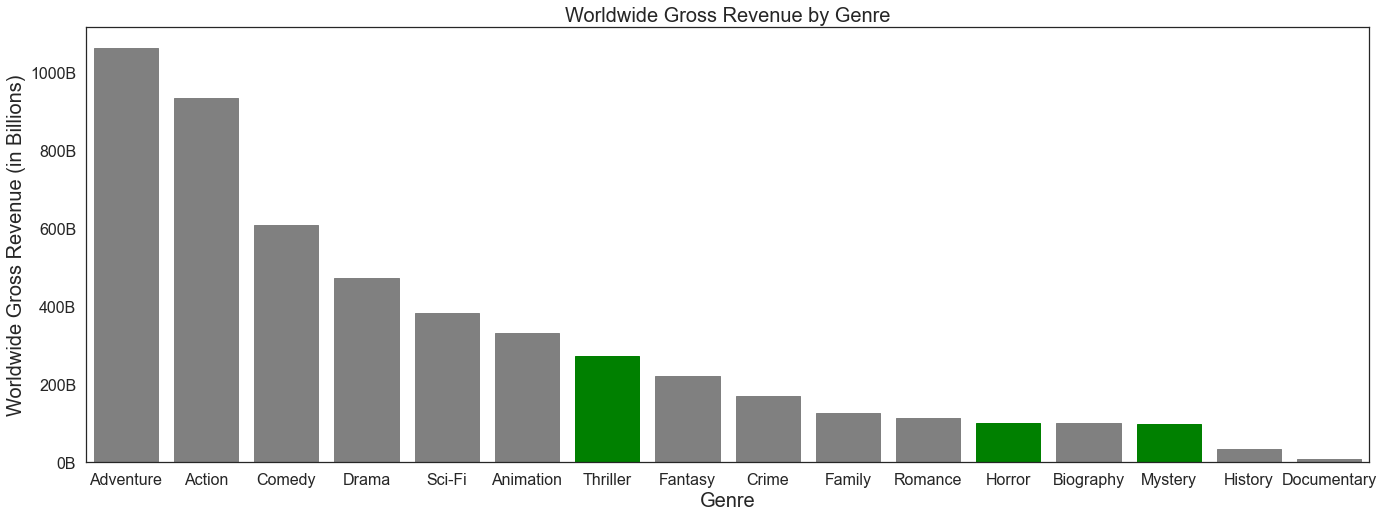

In [33]:
#plotting the top genres - with horror, mystery, and thriller
ylabels = ['0B', '200B', '400B', '600B', '800B', '1000B']

sns.set_theme(style='white', palette=None)
plt.figure(figsize = (23,8))
plt.ticklabel_format(style='plain')
g = sns.barplot(x = 'genre', 
            y =  'worldwide_gross_revenue', 
            data = axis_rev, 
            order = axis_rev.sort_values('worldwide_gross_revenue', ascending = False).genre)

for bar in g.patches:
    if bar.get_height() == 10076403693:
        bar.set_color('green')
    elif bar.get_height() == 27134022953:
        bar.set_color('green')
    elif bar.get_height() == 9679904164:
        bar.set_color('green')
    else:
        bar.set_color('grey')


#set labels
g.grid(False)
g.set_yticklabels(labels = ylabels)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.xlabel('Genre', size = 20)
plt.ylabel('Worldwide Gross Revenue (in Billions)', size = 20)
plt.title('Worldwide Gross Revenue by Genre', size = 20)
plt.show()

#### ROI - Genres

First let's take a look at the production budget for the top 5 grossing genres and our genres that we would like tof focus on - horror, mystery, and thriller.

In [34]:
#calculating the mean for the top genres and the genres we would like to focus on
drama_ww_production_mean = drama_ww_gross_df['production_budget'].mean()
comedy_ww_production_mean = comedy_ww_gross_df['production_budget'].mean()
action_ww_production_mean = action_ww_gross_df['production_budget'].mean()
adventure_ww_production_mean = adventure_ww_gross_df['production_budget'].mean()
thriller_ww_production_mean = thriller_ww_gross_df['production_budget'].mean()
horror_ww_production_mean = horror_ww_gross_df['production_budget'].mean()
scifi_ww_production_mean = scifi_ww_gross_df['production_budget'].mean()
mystery_ww_production_mean = mystery_ww_gross_df['production_budget'].mean()
fantasy_ww_production_mean = fantasy_ww_gross_df['production_budget'].mean()
animation_ww_production_mean = animation_ww_gross_df['production_budget'].mean()

In [35]:
#list of type string - top 10 genres
budget_genre_list = ["drama",'comedy','action','adventure', 'thriller', 
                     'horror', 'sci-Fi','mystery','fantasy','animation']

#list of type int
genre_production_mean_list = [drama_ww_production_mean, comedy_ww_production_mean, action_ww_production_mean, adventure_ww_production_mean, 
                              thriller_ww_production_mean, horror_ww_production_mean, scifi_ww_production_mean, mystery_ww_production_mean, 
                              fantasy_ww_production_mean, animation_ww_production_mean]

In [36]:
#zipping the two lists
production_budget_mean_tuples = list(zip(budget_genre_list, genre_production_mean_list))

#creating a dataframe
production_budget_mean_df = pd.DataFrame(production_budget_mean_tuples, columns = ['genres', 'production_budget_mean'])

In [37]:
#applying the ceiling function for better visualization
production_budget_mean_df['production_budget_mean'] = production_budget_mean_df['production_budget_mean'].apply(np.ceil)
production_budget_mean_df

,genres,production_budget_mean
0,drama,28112023.00000
1,comedy,42364642.00000
2,action,86311338.00000
3,adventure,110703874.00000
4,thriller,38645555.00000
5,horror,20717522.00000
6,sci-Fi,99889776.00000
7,mystery,26831563.00000
8,fantasy,87374737.00000
9,animation,102005883.00000


In [38]:
#sorting the values
production_budget_mean_df.sort_values(by='production_budget_mean', ascending= False, inplace = True)

<ipython-input-39-9357be2f80c8>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels = xlabels)


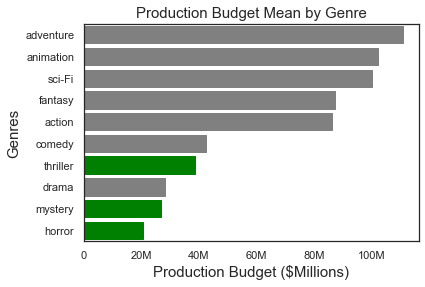

In [39]:
# plotting the production budget
xlabels = ['0', '20M', '40M', '60M', '80M', '100M', '120M']
sns.set_theme(style = 'white')
fig, axes = plt.subplots()
sns.set_color_codes('pastel')
ax = sns.barplot( x= "production_budget_mean", y = 'genres', data = production_budget_mean_df,color = 'b')
ax.set_xticklabels(labels = xlabels)
plt.xlabel('Production Budget ($Millions)', size = 15)
plt.ylabel("Genres", size = 15)
plt.title('Production Budget Mean by Genre', size = 15)

for bar in ax.patches:
    if bar.get_width() == 38645555:
        bar.set_color('green')
    elif bar.get_width() == 26831563:
        bar.set_color('green')
    elif bar.get_width() == 20717522:
        bar.set_color('green')
    else:
        bar.set_color('grey')


plt.show()

In [40]:
#calculating the mean ROI of top 16 genres
drama_ROI_mean = drama_ww_gross_df['ROI'].mean()
comedy_ROI_mean = comedy_ww_gross_df['ROI'].mean()
action_ROI_mean = action_ww_gross_df['ROI'].mean()
adventure_ROI_mean = adventure_ww_gross_df['ROI'].mean()
thriller_ROI_mean = thriller_ww_gross_df['ROI'].mean()
crime_ROI_mean = crime_ww_gross_df['ROI'].mean()
romance_ROI_mean = romance_ww_gross_df['ROI'].mean()
horror_ROI_mean = horror_ww_gross_df['ROI'].mean()
biography_ROI_mean = biography_ww_gross_df['ROI'].mean()
scifi_ROI_mean = scifi_ww_gross_df['ROI'].mean()
mystery_ROI_mean = mystery_ww_gross_df['ROI'].mean()
fantasy_ROI_mean = fantasy_ww_gross_df['ROI'].mean()
animation_ROI_mean = animation_ww_gross_df['ROI'].mean()
family_ROI_mean = family_ww_gross_df['ROI'].mean()
documentary_ROI_mean = documentary_ww_gross_df['ROI'].mean()
history_ROI_mean = history_ww_gross_df['ROI'].mean()
music_ROI_mean = music_ww_gross_df['ROI'].mean()
sport_ROI_mean = sport_ww_gross_df['ROI'].mean()
war_ROI_mean = war_ww_gross_df['ROI'].mean()
western_ROI_mean = western_ww_gross_df['ROI'].mean()
musical_ROI_mean = musical_ww_gross_df['ROI'].mean()
unknown_ROI_mean = unknown_ww_gross_df['ROI'].mean()

In [41]:
#list of type string (different because of ROI)
genre_list = ['Drama', 'Comedy', 'Action', 'Adventure', 'Thriller', 'Crime', 
              'Romance', 'Horror', 'Biography', 'SciFi', 'Mystery', 'Fantasy', 
              'Animation', 'Family', 'Documentary', 'History', 'Music', 'Sport', 
              'War', 'Western', 'Musical', 'Unknown']

#list of type int - mean ROI genres 
genres_ROI_mean = [drama_ROI_mean, comedy_ROI_mean, action_ROI_mean, adventure_ROI_mean, 
                   thriller_ROI_mean, crime_ROI_mean, romance_ROI_mean, horror_ROI_mean, 
                   biography_ROI_mean, scifi_ROI_mean, mystery_ROI_mean, fantasy_ROI_mean, 
                   animation_ROI_mean, family_ROI_mean, documentary_ROI_mean, history_ROI_mean, 
                   music_ROI_mean, sport_ROI_mean, war_ROI_mean, western_ROI_mean, 
                   musical_ROI_mean, unknown_ROI_mean]

In [42]:
#zipping the list genre_ROI_mean and genre_lists
list_of_ROI_mean = list(zip(genre_list, genres_ROI_mean))

#creating a dataframe from the list to able to plot easier
df_ROI_mean = pd.DataFrame(list_of_ROI_mean, columns = ['genres', 'genre_ROI_mean'])


In [43]:
#sorting the values
df_ROI_mean.sort_values(by = 'genre_ROI_mean', ascending= False, inplace = True)
df_ROI_mean.head(10)

,genres,genre_ROI_mean
7,Horror,1266.27215
10,Mystery,1184.67112
4,Thriller,716.49633
17,Sport,370.51899
14,Documentary,345.26913
6,Romance,329.62234
21,Unknown,316.54849
16,Music,302.48078
9,SciFi,302.18073
12,Animation,284.72908


In [44]:
#getting the top 6
top_6_df_ROI_mean = df_ROI_mean.iloc[0:6]
top_6_df_ROI_mean

,genres,genre_ROI_mean
7,Horror,1266.27215
10,Mystery,1184.67112
4,Thriller,716.49633
17,Sport,370.51899
14,Documentary,345.26913
6,Romance,329.62234


<ipython-input-45-3d8206e6e045>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels = xlabels)


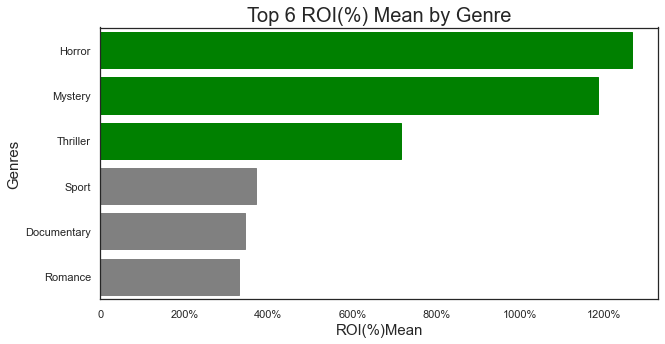

In [45]:
#plotting the top 6 genres - ROI
xlabels = ['0', '200%', '400%', '600%', '800%', '1000%', '1200%']
sns.set_theme(style = "white")
fig, axes = plt.subplots(figsize=(10, 5))
sns.set_color_codes('pastel')
ax = sns.barplot( x= "genre_ROI_mean", y = 'genres', data = top_6_df_ROI_mean, color = 'b')
ax.set_xticklabels(labels = xlabels)
plt.xlabel('ROI(%)Mean', size = 15)
plt.ylabel('Genres', size = 15)
plt.title('Top 6 ROI(%) Mean by Genre', size = 20)

for bar in ax.patches:
    if bar.get_width() > 680:
        bar.set_color('green')
    else:
        bar.set_color('grey')

plt.show()

In [46]:
#production budget will go here

-------
#### Studio 

Top studios that make horror, mystery, and thriller movies.

In [47]:
studio_df = master_movie.copy()

In [48]:
#dropping duplicates 
studio_df.drop_duplicates(subset='movie', ignore_index=True, inplace=True)

In [49]:
#filtering studios who have not made a movie in the past two decades
studio_df= studio_df.loc[studio_df['release_year'] > 2000]

#creating dataframes for horror, mystery, and thriller
studio_horror = studio_df.loc[(studio_df['genre_1'] == "Horror") | (studio_df['genre_2'] == "Horror") | 
                              (studio_df['genre_3'] == "Horror") ]

studio_mystery = studio_df.loc[(studio_df['genre_1'] == "Mystery") | (studio_df['genre_2'] == "Mystery") | 
                               (studio_df['genre_3'] == "Mystery")]

studio_thriller = studio_df.loc[(studio_df['genre_1'] == "Thriller") | (studio_df['genre_2'] == "Thriller") | 
                                (studio_df['genre_3'] == "Thriller")]

#sanity check
studio_horror.head()

,movie_id,release_date,movie,production_budget,domestic_gross,worldwide_gross,studio,genres,averagerating,numvotes,name,category,genre_1,genre_2,genre_3,release_year,ROI
41,tt0816711,2013-06-21,World War Z,190000000,202359711,531514650,Par.,"Action,Adventure,Horror",7.00000,553751,Brad Pitt,actor,Action,Adventure,Horror,2013,179.74455
55,tt4779682,2018-08-10,The Meg,178000000,145443742,529530715,WB,"Action,Horror,Sci-Fi",5.70000,114042,Cliff Curtis,actor,Action,Horror,Sci-Fi,2018,197.48917
100,tt1077368,2012-05-11,Dark Shadows,150000000,79727149,238202668,WB,"Comedy,Fantasy,Horror",6.20000,229818,Christi Dembrowski,producer,Comedy,Fantasy,Horror,2012,58.80178
102,tt0780653,2010-02-12,The Wolfman,150000000,62189884,142634358,Uni.,"Drama,Fantasy,Horror",5.80000,97873,Benicio Del Toro,actor,Drama,Fantasy,Horror,2010,-4.91043
185,tt2316204,2017-05-19,Alien: Covenant,97000000,74262031,238521247,Fox,"Horror,Sci-Fi,Thriller",6.40000,226920,Danny McBride,actor,Horror,Sci-Fi,Thriller,2017,145.89819


In [50]:
#creating a list of the top 5 studios - horror genre
studio_h_name = list(studio_horror['studio'].value_counts().iloc[:5].index)
studio_h_count = list(studio_horror['studio'].value_counts().iloc[:5].values)

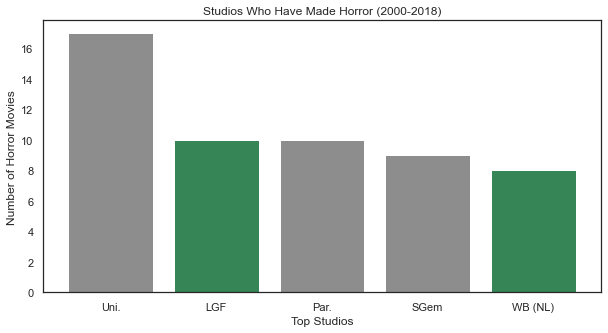

In [51]:
#plotting horror studios
fig, ax = plt.subplots(figsize=(10, 5))

ax.set_xlabel("Top Studios")
ax.set_ylabel("Number of Horror Movies")
ax.set_title("Studios Who Have Made Horror (2000-2018)");

x_pos = np.arange(len(studio_h_name))
plt.bar(x_pos, studio_h_count, color=['#8D8D8D', '#358556', '#8D8D8D', '#8D8D8D', '#358556'])
plt.xticks(x_pos, studio_h_name)
plt.show();

In [52]:
#creating a list of the top 5 studios - mystery genre
studio_m_name = list(studio_mystery['studio'].value_counts().iloc[:5].index)
studio_m_count = list(studio_mystery['studio'].value_counts().iloc[:5].values)

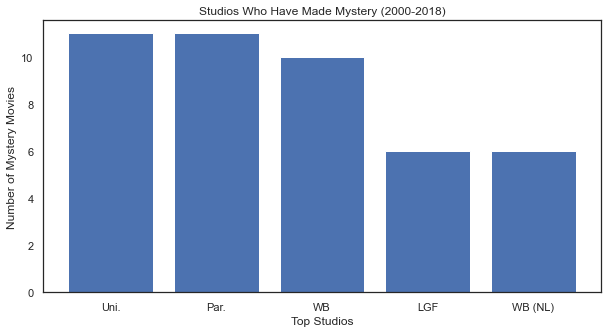

In [53]:
fig, ax = plt.subplots(figsize=(10, 5))

ax.bar(studio_m_name, studio_m_count)
ax.set_xlabel("Top Studios")
ax.set_ylabel("Number of Mystery Movies")
ax.set_title("Studios Who Have Made Mystery (2000-2018)");

In [54]:
#creating a list of the top 5 studios - thriller genre
studio_t_name = list(studio_thriller['studio'].value_counts().iloc[:5].index)
studio_t_count = list(studio_thriller['studio'].value_counts().iloc[:5].values)

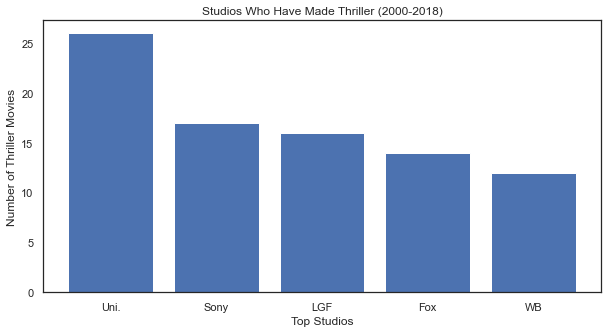

In [55]:
#plotting thriller
fig, ax = plt.subplots(figsize=(10, 5))

ax.bar(studio_t_name, studio_t_count)
ax.set_xlabel("Top Studios")
ax.set_ylabel("Number of Thriller Movies")
ax.set_title("Studios Who Have Made Thriller (2000-2018)");

-------------------
#### Producers

Producers for horror movies (since the movies have the highest ROI)

In [56]:
producer_df = master_movie.copy()

In [57]:
#dropping duplicates
producer_df.drop_duplicates(subset='movie_id', ignore_index=True, inplace=True)

In [58]:
#creating a dataframe for horror
horror = producer_df.loc[(producer_df['genre_1'] == "Horror") | (producer_df['genre_2'] == "Horror") | 
                              (producer_df['genre_3'] == "Horror")]

In [59]:
#filter by producers
producer_horror = horror.loc[horror['category'] == "producer"]

#sanity check
producer_horror.head()

,movie_id,release_date,movie,production_budget,domestic_gross,worldwide_gross,studio,genres,averagerating,numvotes,name,category,genre_1,genre_2,genre_3,release_year,ROI
113,tt1077368,2012-05-11,Dark Shadows,150000000,79727149,238202668,WB,"Comedy,Fantasy,Horror",6.20000,229818,Christi Dembrowski,producer,Comedy,Fantasy,Horror,2012,58.80178
305,tt1855325,2012-09-14,Resident Evil: Retribution,65000000,42345531,240647629,SGem,"Action,Horror,Sci-Fi",5.40000,125191,Robert Kulzer,producer,Action,Horror,Sci-Fi,2012,270.22712
306,tt1418377,2014-01-24,"I, Frankenstein",65000000,19075290,74575290,LGF,"Action,Fantasy,Horror",5.10000,74910,Sidney Kimmel,producer,Action,Fantasy,Horror,2014,14.73122
350,tt1220634,2010-09-10,Resident Evil: Afterlife,57500000,60128566,295874190,SGem,"Action,Adventure,Horror",5.90000,153270,Robert Kulzer,producer,Action,Adventure,Horror,2010,414.56381
483,tt1262416,2011-04-15,Scream 4,40000000,38180928,95989590,W/Dim.,"Horror,Mystery",6.20000,118779,Iya Labunka,producer,Horror,Mystery,None,2011,139.97397


In [60]:
#counting the top horror producers
producer_horror['name'].value_counts()

Jason Blum               16
Brad Fuller               5
Robert Kulzer             3
Peter Safran              2
Larry Fessenden           2
Iya Labunka               2
Julie Richardson          1
Lynn Harris               1
David Linde               1
Robyn Meisinger           1
Chris Briggs              1
Ridley Scott              1
Rebecca Green             1
Miguel Asensio Llamas     1
Geyer Kosinski            1
Sidney Kimmel             1
David Hoberman            1
Seth Grahame-Smith        1
Colin Bates               1
Sean Robins               1
Roy Lee                   1
Barbara Garvey Myers      1
Mem Ferda                 1
Sam Mercer                1
Todd Garner               1
Marc Butan                1
A.D. Oppenheim            1
Joel Silver               1
Sam Raimi                 1
J. Miles Dale             1
John Davis                1
Simon Oakes               1
Thomas A. Bliss           1
Rob Cowan                 1
Daniel Noah               1
Christi Dembrowski  

In [61]:
#creating a list of the top 5 producers
producer_name = list(producer_horror['name'].value_counts().iloc[:5].index)
producer_count = list(producer_horror['name'].value_counts().iloc[:5].values)

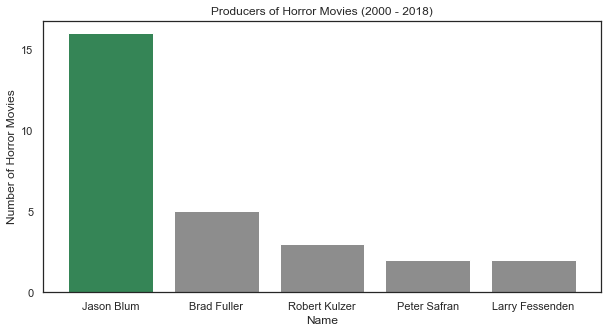

In [62]:
#plotting producers
fig, ax= plt.subplots(figsize=(10, 5))

ax.set_xlabel("Name")
ax.set_ylabel("Number of Horror Movies")
ax.set_title("Producers of Horror Movies (2000 - 2018)")
ax.set_yticks((15, 10, 5, 0))

x_pos = np.arange(len(producer_name))
plt.bar(x_pos, producer_count, color=['#358556', '#8D8D8D', '#8D8D8D', '#8D8D8D', '#8D8D8D'])
plt.xticks(x_pos, producer_name)

plt.show();

In [63]:
#getting only the movies produced by Jason Blum
jason = producer_horror.loc[producer_horror['name'] == 'Jason Blum']

#sanity check
jason.head()

,movie_id,release_date,movie,production_budget,domestic_gross,worldwide_gross,studio,genres,averagerating,numvotes,name,category,genre_1,genre_2,genre_3,release_year,ROI
1030,tt5726086,2018-01-05,Insidious: The Last Key,10000000,67745330,167885588,Uni.,"Horror,Mystery,Thriller",5.70000,42154,Jason Blum,producer,Horror,Mystery,Thriller,2018,1578.85588
1181,tt5052448,2017-02-24,Get Out,5000000,176040665,255367951,Uni.,"Horror,Mystery,Thriller",7.70000,400474,Jason Blum,producer,Horror,Mystery,Thriller,2017,5007.35902
1185,tt4972582,2017-01-20,Split,5000000,138141585,278964806,Uni.,"Horror,Thriller",7.30000,358543,Jason Blum,producer,Horror,Thriller,None,2017,5479.29612
1188,tt1778304,2011-10-21,Paranormal Activity 3,5000000,104028807,207039844,Par.,"Horror,Mystery,Thriller",5.80000,85689,Jason Blum,producer,Horror,Mystery,Thriller,2011,4040.79688
1195,tt3567288,2015-09-11,The Visit,5000000,65206105,98677816,Uni.,"Horror,Mystery,Thriller",6.20000,102459,Jason Blum,producer,Horror,Mystery,Thriller,2015,1873.55632


In [64]:
#return on investment for Jason Blum
jason['ROI'].sum()

82539.61289785714

In [65]:
#getting only the movies produced by Jason Blum
brad = producer_horror.loc[producer_horror['name'] == 'Brad Fuller']

#return on investment for Brad Fuller
brad['ROI'].sum()

8866.189008376068

The ROI mean percentage for Jason Blum is 82539.61% and Brad Fuller is 8866.18%. That is a 73673.43% difference!

-------------
# Conclusions

The movie genres that have the highest ROI are horror, myster, or thriller. These projects will give Microsoft the most bang for their buck and won’t cause their pockets to feel too light if the movie flops, due to the low budget of each of these movie types. The focus is to gain as much movie making experience as possible, so a partnership with either Lionsgate or WB is advised. And finally, hiring or partnering with Jason Blum as the producer of Microsoft’s first film will help further increase the experience they gain from this market entry.
